<a href="https://colab.research.google.com/github/Ajmaljalal/Deep-Learning/blob/main/Build_your_own_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt
from scipy.stats import norm

class NeuralNetwork:
  def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
    self.i_nodes = input_nodes
    self.h_nodes = hidden_nodes
    self.o_nodes = output_nodes
    self.lr = learning_rate

    self.wih = np.random.normal(0.0, pow(self.h_nodes, -0.5), (self.h_nodes, self.i_nodes))
    self.who = np.random.normal(0.0, pow(self.o_nodes, -0.5), (self.o_nodes, self.h_nodes))

    self.activation_function = lambda x: scipy.special.expit(x)


  def query(self, inputs_list):
    # Convert inputs list to 2d array
    inputs = np.array(inputs_list, ndmin=2).T

    # forward pass to hidden layer
    hidden_inputs = np.dot(self.wih, inputs)
    hidden_outputs = self.activation_function(hidden_inputs)

    # forwared pass to output layer
    output_inputs = np.dot(self.who, hidden_outputs)
    final_outputs = self.activation_function(output_inputs)

    return final_outputs

  def train(self, inputs_list, targets_list):
    targets = np.array(targets_list, ndmin=2).T
    # Convert inputs list to 2d array
    inputs = np.array(inputs_list, ndmin=2).T

    # forward pass to hidden layer
    hidden_inputs = np.dot(self.wih, inputs)
    hidden_outputs = self.activation_function(hidden_inputs)

    # forwared pass to output layer
    output_inputs = np.dot(self.who, hidden_outputs)
    final_outputs = self.activation_function(output_inputs)

    output_errors = targets - final_outputs
    hidden_errors = np.dot(self.who.T, output_errors)

   # calculate the gradient
    output_gradients = output_errors * final_outputs * (1.0 - final_outputs)
    hidden_gradients = hidden_errors * hidden_outputs * (1.0 - hidden_outputs)

   # udate the weights
    self.who += self.lr * np.dot(output_gradients, hidden_outputs.T)
    self.wih += self.lr * np.dot(hidden_gradients, inputs.T)


In [ ]:
import tensorflow as tf

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(f"Shape of training images: {x_train.shape}")
print(f"Shape of training labels: {y_train.shape}")
print(f"Shape of test images: {x_test.shape}")
print(f"Shape of test labels: {y_test.shape}")
print(y_train[0])

Shape of training images: (60000, 28, 28)
Shape of training labels: (60000,)
Shape of test images: (10000, 28, 28)
Shape of test labels: (10000,)
5


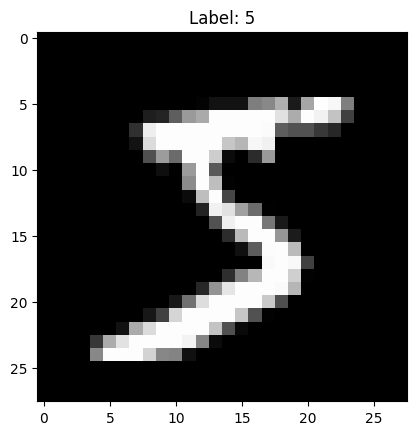

60000


In [ ]:
# Display the first training image and its label as an example
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()


In [ ]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
learning_rate = 0.05

nn = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [ ]:
# Loop through the training data
epochs = 2
for epoch in range(epochs):
  print(f"Epoch {epoch+1}/{epochs}")
  for index, record in enumerate(x_train):
    # Scale and shift the inputs (pixel values)
    # Flatten the 28x28 image into a 1D array of 784 values
    inputs = (record.flatten() / 255.0 * 0.99) + 0.01

    # Create the target output array (one-hot encoding)
    targets = np.zeros(output_nodes) + 0.01
    # The correct label for this image is from y_train
    label = y_train[index]
    targets[label] = 0.99

    # Train the neural network with the current input and target
    nn.train(inputs, targets)
    pass

Epoch 1/2
Epoch 2/2


Overall accuracy: 96.46%


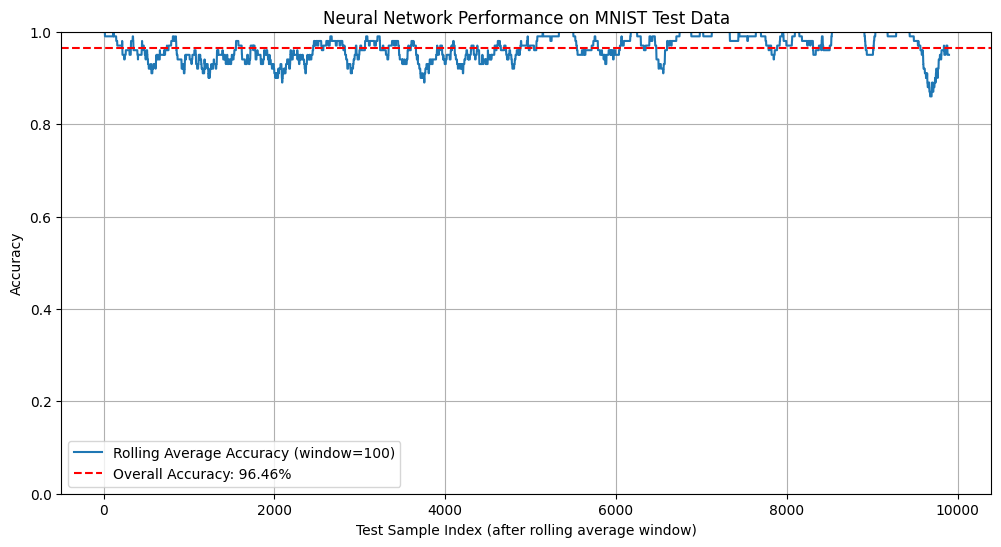

In [ ]:
# testing the trained network
scorecard = []

# Loop through the test data
for index, record in enumerate(x_test):
  test_inputs_raw = x_test[index]
  correct_label = y_test[index]

  # Flatten the 28x28 image into a 1D array of 784 values and scale it
  processed_test_inputs = (test_inputs_raw.flatten() / 255.0 * 0.99) + 0.01

  # Query the neural network
  outputs = nn.query(processed_test_inputs)

  # Find the index of the highest output, which is the network's prediction
  predicted_label = np.argmax(outputs)
  scorecard.append(int(predicted_label == correct_label))

# Calculate overall accuracy
accuracy = np.sum(scorecard) / len(scorecard)
print(f"Overall accuracy: {accuracy*100:.2f}%")

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot rolling average accuracy
# Using a window size of 100 to smooth the curve
rolling_accuracy = np.convolve(scorecard, np.ones(100)/100, mode='valid')
plt.plot(rolling_accuracy, label='Rolling Average Accuracy (window=100)')

# Plot overall average accuracy
plt.axhline(y=accuracy, color='r', linestyle='--', label=f'Overall Accuracy: {accuracy*100:.2f}%')

plt.title('Neural Network Performance on MNIST Test Data')
plt.xlabel('Test Sample Index (after rolling average window)')
plt.ylabel('Accuracy')
plt.ylim(0, 1) # Accuracy is between 0 and 1
plt.legend()
plt.grid(True)
plt.show()